In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv
/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset_Description.pdf


# import libraries

In [2]:
import numpy as np # for math
import pandas as pd # to deal with data 
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # same
# for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')

In [4]:
df.head(5)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
df.shape

(1000, 14)

In [6]:
df.dtypes

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [8]:
df.duplicated().sum()

0

There is no null values or duplicated, data types are accurate. Data already clean

# Filtering and Visualization


I will distribute columnns twice one with Presence of Heart Disease and another without 

Distribution of Age

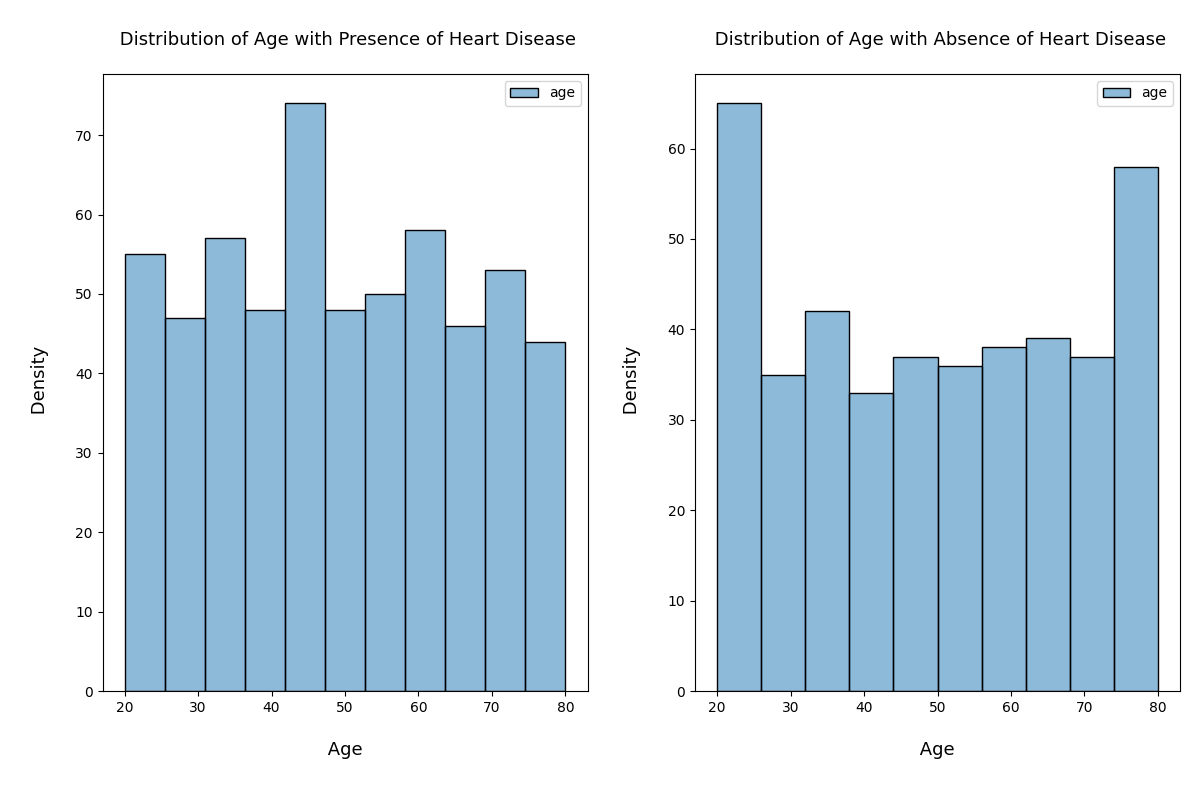

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.histplot(df.loc[df.target == 1][["age"]], ax=axes[0])
axes[0].set_title('\n Distribution of Age with Presence of Heart Disease\n', fontsize=13)
axes[0].set_xlabel('\n Age \n', fontsize=13)
axes[0].set_ylabel('\n Density\n', fontsize=13)

sns.histplot(df.loc[df.target == 0][["age"]], ax=axes[1])
axes[1].set_title('\n Distribution of Age with Absence of Heart Disease\n', fontsize=13)
axes[1].set_xlabel('\n Age \n', fontsize=13)
axes[1].set_ylabel('\n Density\n', fontsize=13)
plt.tight_layout()
plt.show()

Distribution of Gender

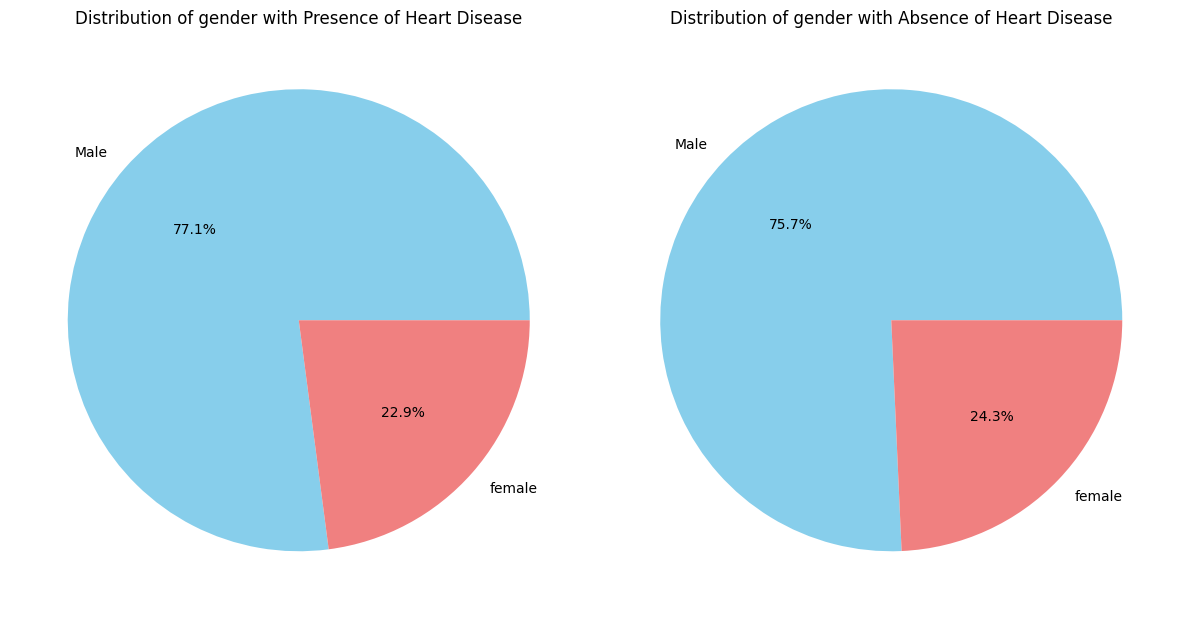

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
gender_1 = df.loc[df.target == 1][["gender"]]
axes[0].pie(gender_1.value_counts(), labels=['Male','female'], autopct='%1.1f%%', colors = ['skyblue', 'lightcoral']) 
axes[0].set_title('Distribution of gender with Presence of Heart Disease')

gender_0 = df.loc[df.target == 0][["gender"]]
axes[1].pie(gender_0.value_counts(), labels=['Male','female'], autopct='%1.1f%%', colors = ['skyblue', 'lightcoral']) 
axes[1].set_title('Distribution of gender with Absence of Heart Disease')
plt.tight_layout()
plt.show()

Distribution of Resting Blood Presure

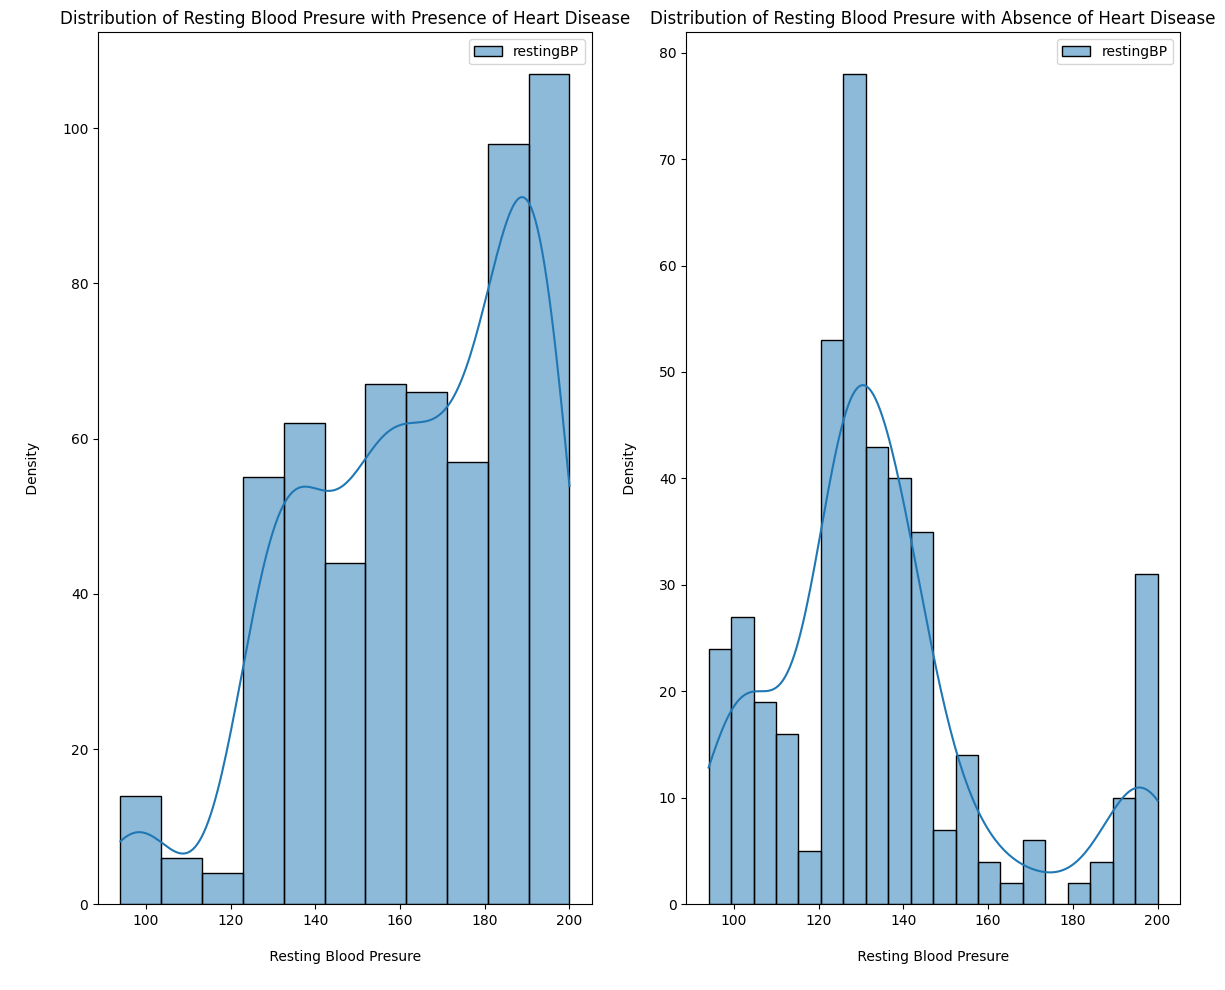

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
sns.histplot(df.loc[df.target == 1][["restingBP"]],kde=True,color="grey", ax=axes[0])
axes[0].set_title('Distribution of Resting Blood Presure with Presence of Heart Disease')
axes[0].set_xlabel('\n Resting Blood Presure \n')
axes[0].set_ylabel('\n Density \n')

sns.histplot(df.loc[df.target == 0][["restingBP"]],kde=True,color="grey", ax=axes[1])
axes[1].set_title('Distribution of Resting Blood Presure with Absence of Heart Disease')
axes[1].set_xlabel('\n Resting Blood Presure \n')
axes[1].set_ylabel('\n Density \n')
plt.tight_layout()
plt.show()

Distribution of Chest pain

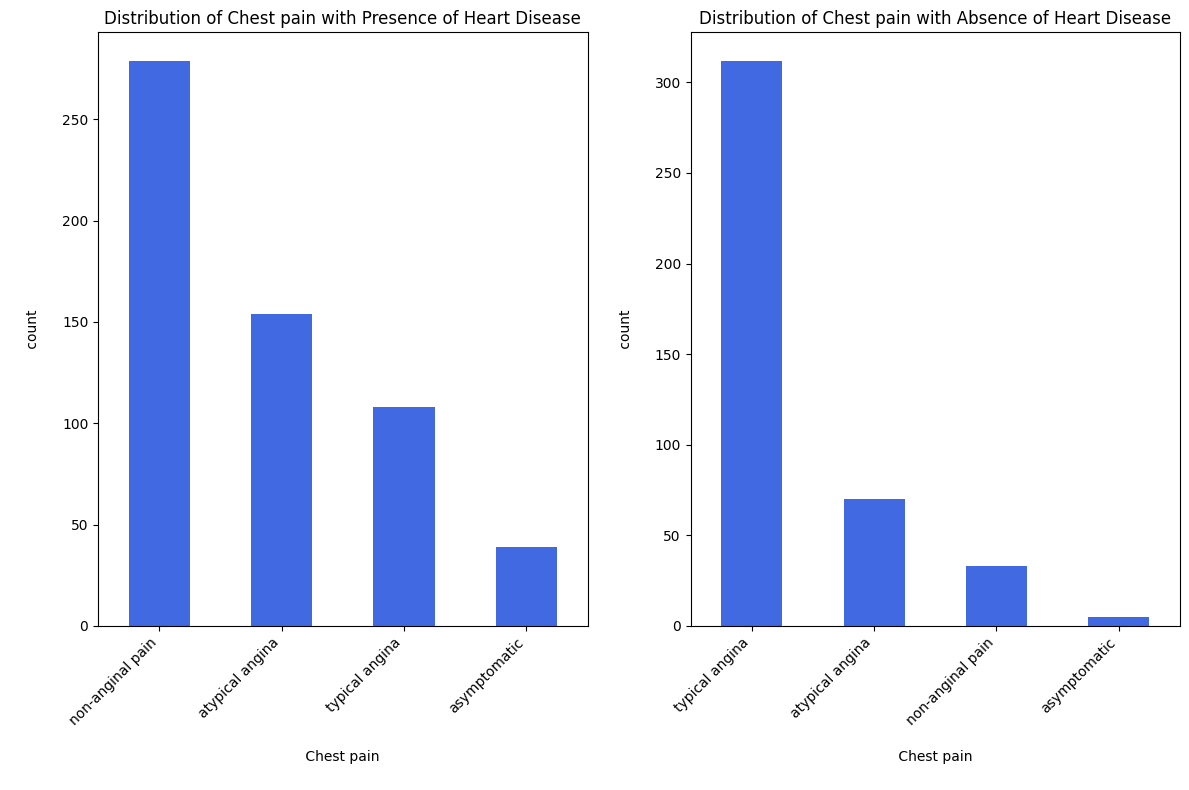

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
chestpain_1 = df.loc[df.target == 1][["chestpain"]]
chestpain_1.value_counts().plot(kind="bar", color='royalblue', ax=axes[0])
label=['non-anginal pain', 'atypical angina', 'typical angina', 'asymptomatic']
axes[0].set_xticklabels(label, rotation=45, ha='right')
axes[0].set_title('Distribution of Chest pain with Presence of Heart Disease')
axes[0].set_xlabel('\n Chest pain \n')
axes[0].set_ylabel('\n count \n')

chestpain_0 = df.loc[df.target == 0][["chestpain"]]
chestpain_0.value_counts().plot(kind="bar", color='royalblue', ax=axes[1])
label=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
axes[1].set_xticklabels(label, rotation=45, ha='right')
axes[1].set_title('Distribution of Chest pain with Absence of Heart Disease')
axes[1].set_xlabel('\n Chest pain \n')
axes[1].set_ylabel('\n count \n')
plt.tight_layout()
plt.show()

Distribution of Serum cholesterol

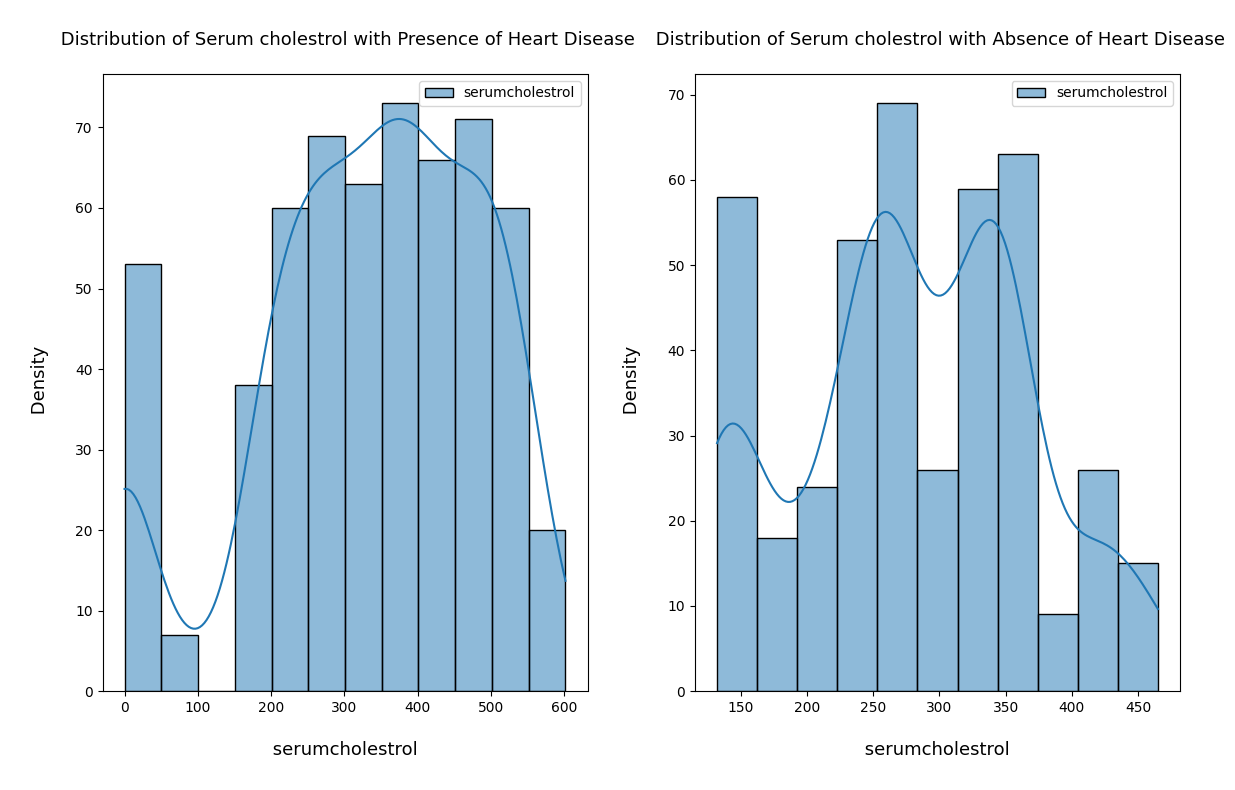

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.histplot(df.loc[df.target == 1][["serumcholestrol"]], kde=True,color="grey", ax=axes[0])
axes[0].set_title('\n Distribution of Serum cholestrol with Presence of Heart Disease\n', fontsize=13)
axes[0].set_xlabel('\n serumcholestrol \n', fontsize=13)
axes[0].set_ylabel('\n Density\n', fontsize=13)

sns.histplot(df.loc[df.target == 0][["serumcholestrol"]], kde=True,color="grey", ax=axes[1])
axes[1].set_title('\n Distribution of Serum cholestrol with Absence of Heart Disease\n', fontsize=13)
axes[1].set_xlabel('\n serumcholestrol \n', fontsize=13)
axes[1].set_ylabel('\n Density\n', fontsize=13)
plt.tight_layout()
plt.show()

Distribution of Oldpeak 

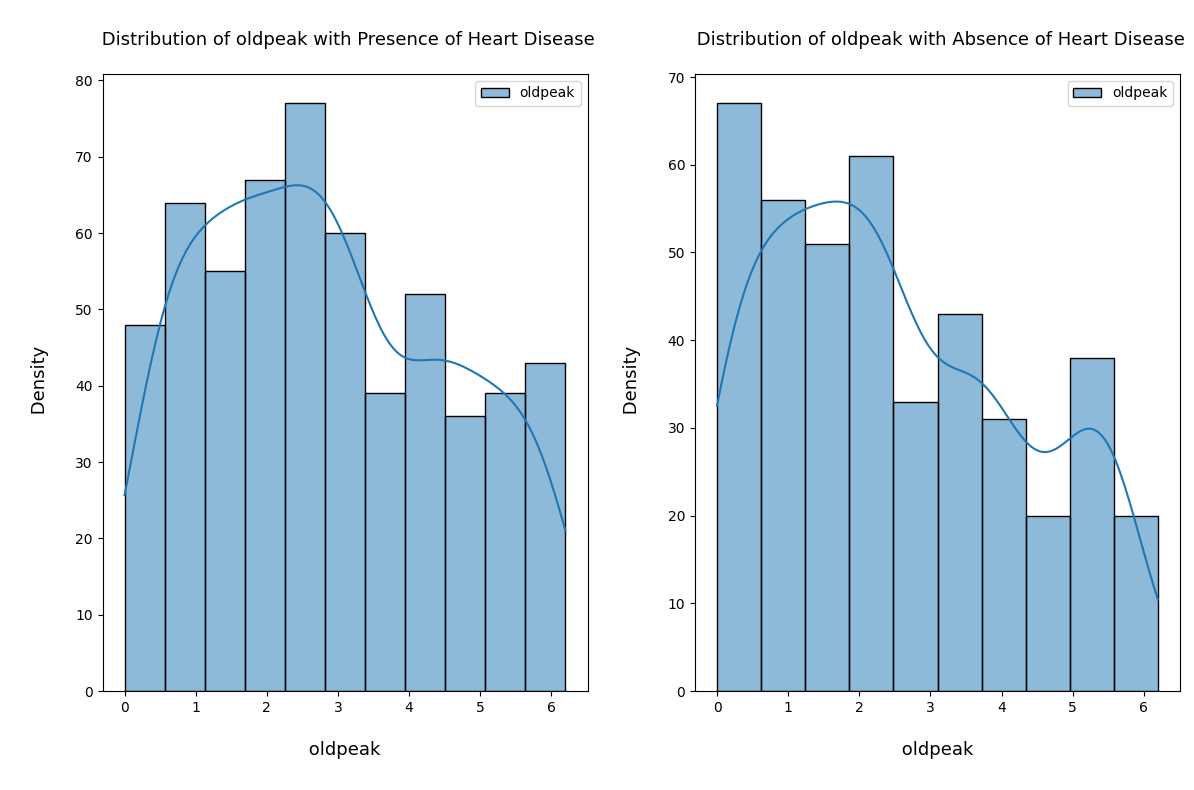

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.histplot(df.loc[df.target == 1][["oldpeak"]], kde=True,color="grey", ax=axes[0])
axes[0].set_title('\n Distribution of oldpeak with Presence of Heart Disease\n', fontsize=13)
axes[0].set_xlabel('\n oldpeak \n', fontsize=13)
axes[0].set_ylabel('\n Density\n', fontsize=13)

sns.histplot(df.loc[df.target == 0][["oldpeak"]], kde=True,color="grey", ax=axes[1])
axes[1].set_title('\n Distribution of oldpeak with Absence of Heart Disease\n', fontsize=13)
axes[1].set_xlabel('\n oldpeak \n', fontsize=13)
axes[1].set_ylabel('\n Density\n', fontsize=13)
plt.tight_layout()
plt.show()

Distribution of Maximum heart rate achieved

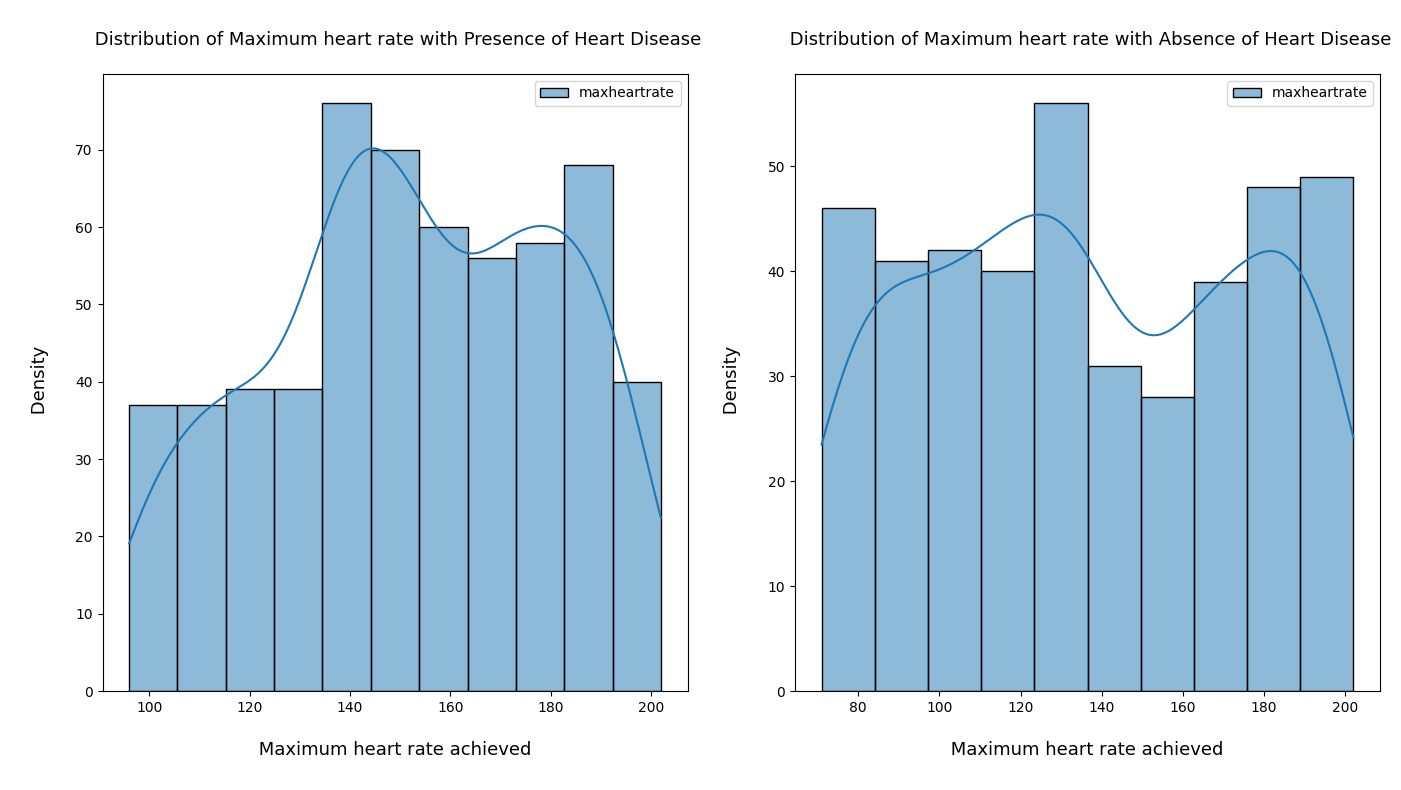

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
sns.histplot(df.loc[df.target == 1][["maxheartrate"]], kde=True,color="grey", ax=axes[0])
axes[0].set_title('\n Distribution of Maximum heart rate with Presence of Heart Disease\n', fontsize=13)
axes[0].set_xlabel('\n Maximum heart rate achieved \n', fontsize=13)
axes[0].set_ylabel('\n Density\n', fontsize=13)

sns.histplot(df.loc[df.target == 0][["maxheartrate"]], kde=True,color="grey", ax=axes[1])
axes[1].set_title('\n Distribution of Maximum heart rate with Absence of Heart Disease\n', fontsize=13)
axes[1].set_xlabel('\n Maximum heart rate achieved \n', fontsize=13)
axes[1].set_ylabel('\n Density\n', fontsize=13)
plt.tight_layout()
plt.show()

Distribution of Fasting blood sugar

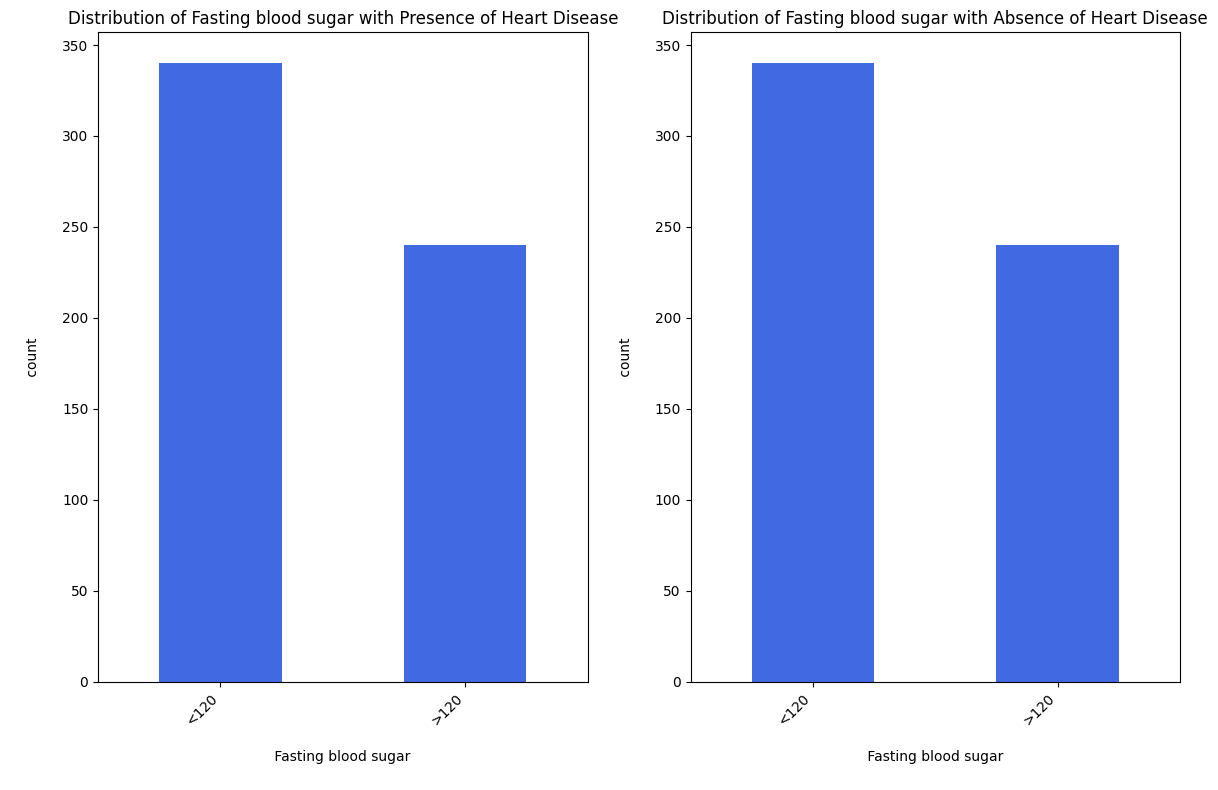

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
fastingbloodsugar_1 = df.loc[df.target == 1][["fastingbloodsugar"]]
fastingbloodsugar_1.value_counts().plot(kind="bar", color='royalblue', ax=axes[0])
label=['<120', '>120']
axes[0].set_xticklabels(label, rotation=45, ha='right')
axes[0].set_title('Distribution of Fasting blood sugar with Presence of Heart Disease')
axes[0].set_xlabel('\n Fasting blood sugar \n')
axes[0].set_ylabel('\n count \n')

fastingbloodsugar_0 = df.loc[df.target == 1][["fastingbloodsugar"]]
fastingbloodsugar_0.value_counts().plot(kind="bar", color='royalblue', ax=axes[1])
label=['<120', '>120']
axes[1].set_xticklabels(label, rotation=45, ha='right')
axes[1].set_title('Distribution of Fasting blood sugar with Absence of Heart Disease')
axes[1].set_xlabel('\n Fasting blood sugar \n')
axes[1].set_ylabel('\n count \n')
plt.tight_layout()
plt.show()

Correlation between columns

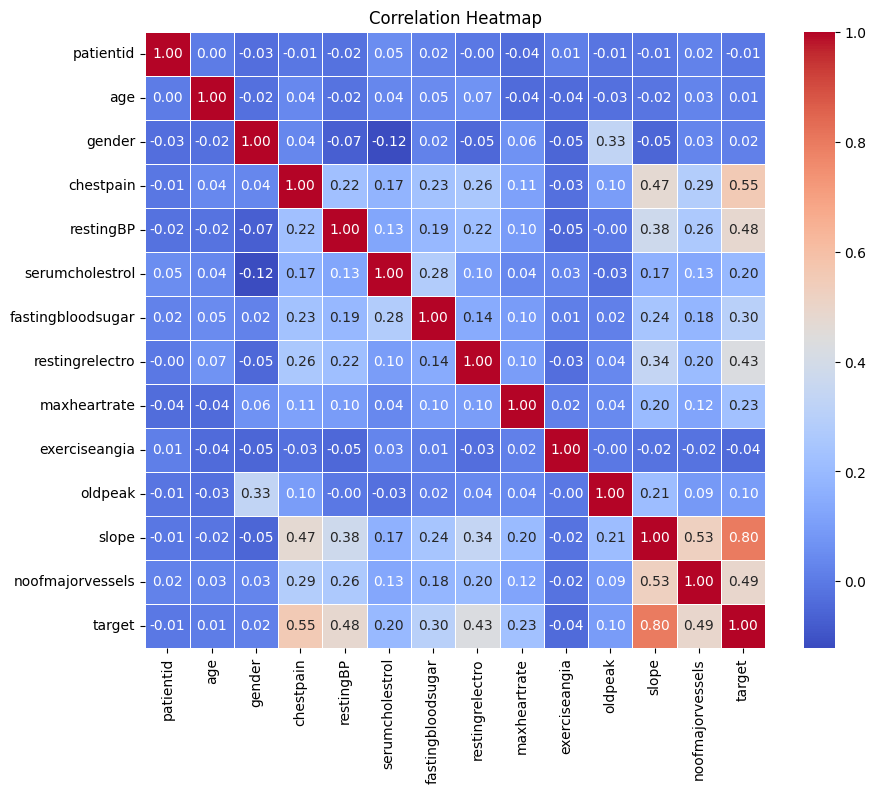

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Feature selection

In [18]:
X,y = df.iloc[:,1:-1], df[['target']]

Feature scaling

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Spliting data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

Modeling

In [21]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [22]:
y_pred = sgd_clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

Measuring performance

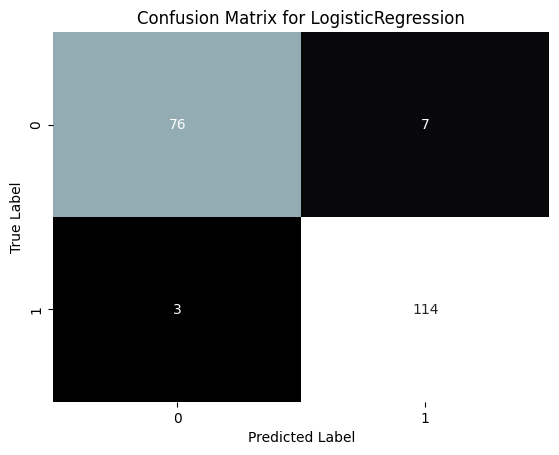

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
precision_score = metrics.precision_score(y_test, y_pred)
print(f'Precision_Score: {precision_score:.2f}')
recall_score = metrics.recall_score(y_test, y_pred)
print(f'Recall_Score: {recall_score:.2f}')

Accuracy: 0.95
Precision_Score: 0.94
Recall_Score: 0.97


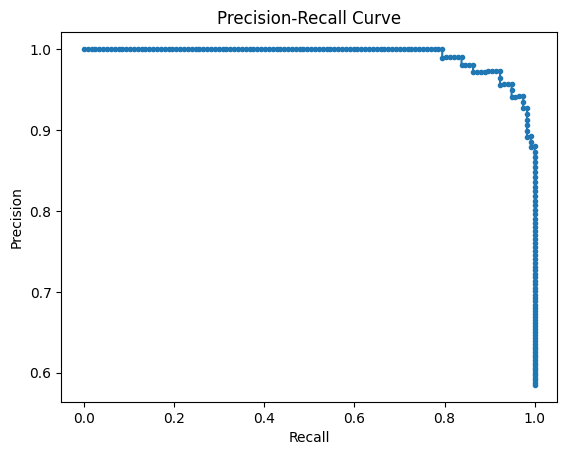

In [25]:
y_scores = sgd_clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

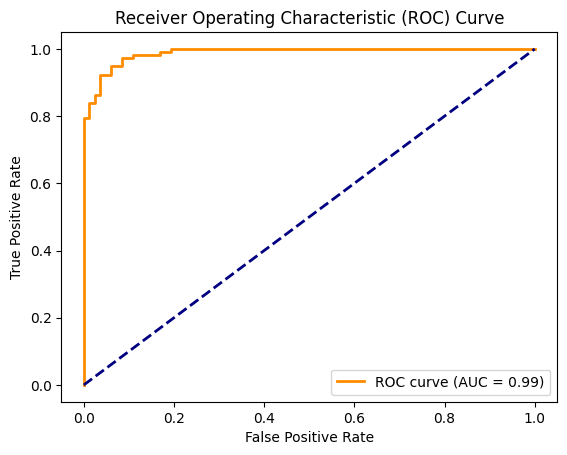

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Another Model

In [27]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [28]:
y_pred = knn_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

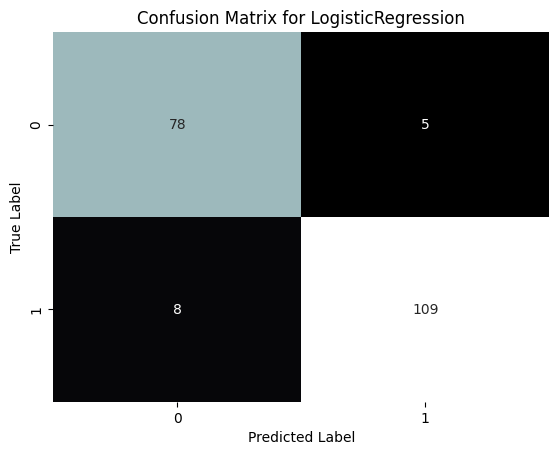

In [29]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='bone', cbar=False)
plt.title('Confusion Matrix for LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
pre_score = metrics.precision_score(y_test, y_pred)
print(f'Precision_Score: {pre_score:.2f}')
recall_score = metrics.recall_score(y_test, y_pred)
print(f'Recall_Score: {recall_score:.2f}')

Accuracy: 0.94
Precision_Score: 0.96
Recall_Score: 0.93


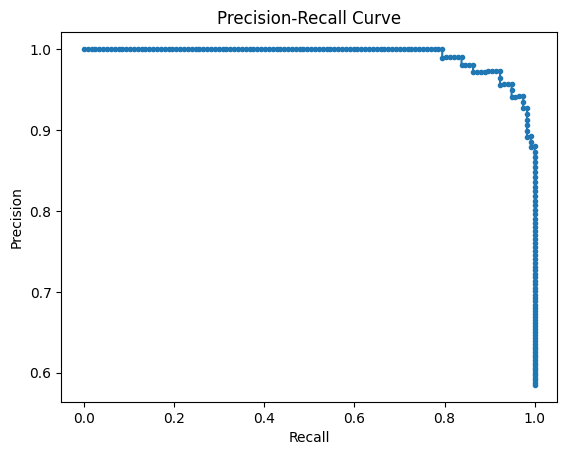

In [31]:
y_scores = sgd_clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

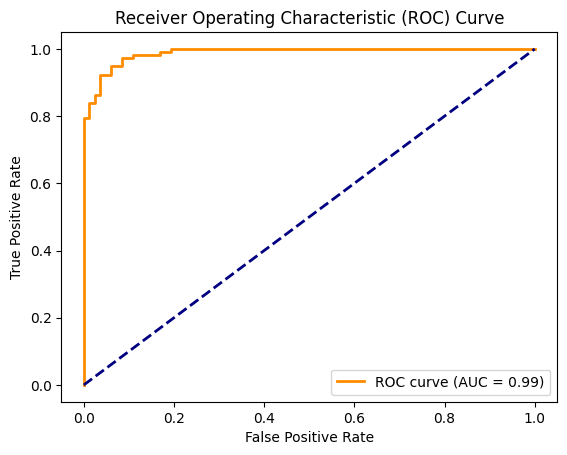

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()